## N-gram

In [1]:
# 라이브러리 불러오기
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk # 자연어 처리를 위한 파이썬 패키지
from nltk.util import ngrams # 문자열에서 N개의 연속된 요소를 추출하는 방법

In [2]:
file_path = 'C:\\Users\\cho03\\Downloads\\세미나\\방학 세미나\\' # data가 저장된 파일 경로
# 데이터 불러오기
f = open(file_path + "total_docs1.pkl", "rb")
df = pickle.load(f)
f.close()

In [3]:
# 감성 분석 결과를 바탕으로 긍정, 중립, 부정을 나타내는 sentiment 열 추가
senti = []

for i in range(len(df)):
    if df['score'].iloc[i] <= -0.4:
        senti.append(-1)     # -0.4 이하인 경우 부정적으로 판단, -1로 표시
    elif df['score'].iloc[i] <= 0.4:
        senti.append(0)      # -0.4 초과 0.4 이하인 경우 중립적으로 판단, 0으로 표시
    else:
        senti.append(1)      # 0.4 초과인 경우 긍정적으로 판단, 1로 표시
    
df['sentiment'] = senti
df

,title,doc,like,comment_cnt,comment_list,img,div,ch,ch2,title_token_list_pos,...,doc_token_noun,doc_token_list_pos,comment_token_list_pos,comment_token_noun,doc_topic,comment_topic,sentiword,values,score,sentiment
0,급여노인장기요양인정신청 아들보다 딸이 부양하는 시대,저출산과 맞물려 우리가 생각해봐야 할 것이다저출산은 국가 성장의 미래 문제만으로 ...,5,<NA>,,2,0,naver,blog,"[(급여, NNG), (노인, NNP), (장기, NNP), (요양, NNP), (...",...,"[저출산, 저출산, 성장, 미래, 문제, 국한, 고령화사회, 시점, 세대, 생존, ...","[(저출산, NNP), (과, JC), (맞물리, VV), (어, EC), (우리,...",[],[],2,0,"[강하게, 개선, 그릇된, 긍정, 긍정적, 긍정적으로, 기대, 넉넉한, 대상, 못된...","[1, 2, -2, 1, 1, 2, 1, 1, 1, -2, -1, -1, 1, 1,...",-0.234043,0
1,한국 2070년 노인부양 부담 세계1위,통계청 세계 한국 인구전망급속한 저출산 고령화 직격탄한국 인구 27프로 감소 3...,50,2,인구절벽인 일본보다 출생율이 낮은건 충격이에요 고령화도 예상보다 빠르고요 사회전체가...,2,0,naver,blog,"[(한국, NNP), (2070, SN), (년, NNB), (노인, NNP), (...",...,"[통계청, 인구, 전망, 급속, 저출산, 직격탄, 인구, 프로, 인구, 프로, 프로...","[(통계청, NNG), (세계, NNG), (한국, NNP), (인구, NNG), ...","[(인구, NNP), (절벽, NNP), (이, VCP), (ㄴ, ETM), (일본...","[인구, 절벽, 일본, 출생, 충격, 예상, 전체, 고민, 출산, 육아, 전체, 고민]",2,1,"[강하게, 격한, 기대, 기대되는, 부담, 비관적, 비관적인, 성이, 스트레스, 좋...","[1, -2, 1, 2, -2, -2, -2, 0, -2, 2, 2, 2, -2]",-0.153846,0
2,여성노인 부양,부양제2판 노인복지론 2002 p284부양의 양과 종류는 가족이 가진 경제적 자...,4,<NA>,,4,0,naver,blog,"[(여성, NNG), (노인, NNP), (부양, NNP)]",...,"[복지, 종류, 자원, 구조, 부양자, 피부, 관계, 에너지, 필요, 문제, 지의,...","[(부양, NNP), (제, XPN), (2, SN), (판, NNB), (노인, ...",[],[],1,0,"[높은, 대가, 대상, 도움, 도움을 주는, 스트레스, 심한, 약하면, 어려움, 어...","[1, 1, 1, 1, 2, -2, -2, -1, -2, -2, -1, -1, -2...",-0.533333,-1
3,65세 이상 노인 부양가정이라면,65세 이상 노인 부양가정이라면안녕하세요저희는 어르신들의 남은 여생을 더욱 풍요롭고...,3,1,좋은 소식 열심히 읽고 갑니다,12,1,naver,blog,"[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (부양...",...,"[가정, 라면, 남은, 여생, 풍요, 안락, 최선, 노력, 복지, 센터, 소식, 인...","[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (부양...","[(좋, VA), (은, ETM), (소식, NNG), (열심히, MAG), (읽,...",[소식],2,2,"[감사, 고충, 꼼꼼하게, 대가, 도움, 무료로, 병을, 분이나, 새로운, 소득, ...","[2, -2, 1, 1, 1, 1, -2, -2, 1, 1, 1, 1, 2, -2,...",0.533333,1
4,가족관계 변화와 노인 부양,가족관계 변화와 노인 부양노인 거주 형태의 변화 혼자 살거나 노부부만 사는 세대가...,2,<NA>,,1,0,naver,blog,"[(가족, NNG), (관계, NNG), (변화, NNG), (와, JC), (노인...",...,"[관계, 변화, 거주, 형태, 변화, 부부, 세대, 추세, 부부, 관계, 변화, 부...","[(가족, NNG), (관계, NNG), (변화, NNG), (와, JC), (노인...",[],[],1,0,"[가치, 갈등, 감사, 고통, 긍정, 긍정적, 긍정적으로, 대가, 독감, 만족, 바...","[1, -1, 2, -2, 1, 1, 2, 1, -1, 2, 2, -2, -1, -...",0.160000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,노인은 무엇으로 사는가 감사의 마음으로 사는 것이다,노인은 무엇으로 사는가 감사의 마음으로 사는 것이다이런 질문부터 시작 해 보자 당...,3,4,감사합니다좋은 글 잘 읽고 갑니다목요일날을 잘 보내셨는지요 저녁시간에 컴퓨터앞에 앉...,4,0,daum,cafe,"[(노인, NNG), (은, JX), (무엇, NP), (으로, JKB), (살, ...",...,"[감사, 마음, 시작, 인생, 감사, 감사, 감사, 길목, 대차, 대조표, 후회, ...","[(노인, NNG), (은, JX), (무엇, NP), (으로, JKB), (살, ...","[(감사, NNG), (하, XSV), (ㅂ니다, EC), (좋, VA), (은, ...","[감사, 목요일, 저녁, 컴퓨터, 음악, 소리, 비소, 예보, 미세먼지, 코로나, ...",3,2,"[감동, 감사, 감사하는, 감사하다, 근심, 근심이, 긍정, 긍정적, 긍정적인, 기...","[2, 2, 2, 2, -1, -1, 1, 1, 2, 2, 1, -1, 2, 2, ...",0.966102,1
2163,한 장으로 보는 우리나라가 망한 이유jpg,출처대한민국 통계청인류 역사상 유래 없는 현상곧우리나라인구의40가65세이상노인으로구...,3,59,통일되서 자신들의 기득권이 없어지느니 망해버리길 바랄겁니다 그런자들 이니까인구관련 ...,2,0,daum,cafe,"[(한, MM), (장, NNG), (으로, JKB), (보, VV), (는, ET...",...,"[출처, 대한민국 통계청, 인류, 역사, 유래, 현상, 인구, 구성, 비가, 청년,...","[(출처, NNG), (대한민국 통계청, NNP), (인류, NNG), (역사, N...","[(통일, NNG), (되, XSV), (서, EC), (자신, NNG), (들, ...","[통일, 기득, 바랄, 인구, 관련, 대표, 넌센스, 북한, 남한, 북한, 남한, ...",1,1,[],[],0.000000,0
2164,65세 이상 노인 혜택 50가지 몰라서 못 쓰는 사람이 더 많아1탄,65세 이상 노인 혜택 50가지 몰라서 못 쓰는 사람이 더 많아1탄by M가이드현재...,0,0,,6,0,daum,cafe,"[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (혜택...",...,"[혜택, 가지, 가이드, 규정, 연금, 요양, 혜택, 혜택, 가지, 혜택, 가지, ...","[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (혜택...",[],[],2,0,"[걱정, 고혈압, 대상, 도움, 많다, 모르는, 무료로, 부담, 분에, 불편, 불편...","[-2, -1, 1, 1, 2, -1, 1, -2, -2, -2, -2, 2, 0,...",0.050000,0
2165,청주주간보호 청주요양원 추천 kbs방영된 프로그램전문기관 재활운동 요양등급상담 99...,KBS방영된 프로그램전문기관 9988 청주노인주간보호센터입니다 33명 정원의 아늑한...,0,0,,26,2,daum,cafe,"[(청주, NNP), (주간, NNG), (보호, NNG), (청주, NNP), (...",...,"[방영, 프로그램, 전문, 기관, 보호, 센터, 정원, 분위기, 부모, 마음, 부모...","[(KBS, SL), (방영, NNG)

In [4]:
# Unigram 추출 함수 정의
def extract_ngrams(tokens, num):
    # ngrams() 함수를 사용하여 입력 토큰(tokens)에서 길이가 num인 n-그램을 추출
    n_grams = ngrams(tokens, num)
    n_grams = [ ' '.join(grams) for grams in n_grams] # 추출된 n-그램을 공백으로 구분된 문자열로 변환
    return n_grams # 변환된 n-그램 리스트를 반환

# Unigram 카운트 함수 정의
def count_ngrams(df, num):
    # 빈 딕셔너리를 생성하여 n-그램과 해당 빈도를 저장할 gram_dict 변수를 초기화
    gram_dict = {}
    for i in df:
        # extract_ngrams 함수를 사용하여 현재 항목 i에서 길이가 num인 n-그램을 추출
        grams = extract_ngrams(i, num)
        
        # 추출된 n-그램들을 반복하여 gram_dict에 추가하거나 갱신
        for j in grams:
            if j in gram_dict:
                gram_dict[j] += 1
            else:
                gram_dict[j] = 1
                
    # gram_dict의 항목들을 빈도를 기준으로 내림차순으로 정렬하여 새로운 딕셔너리로 변환
    gram_dict = dict(sorted(gram_dict.items(), key=lambda item: item[1], reverse=True))
    return gram_dict

### Unigrams : 1개의 단어로 토큰화

In [5]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

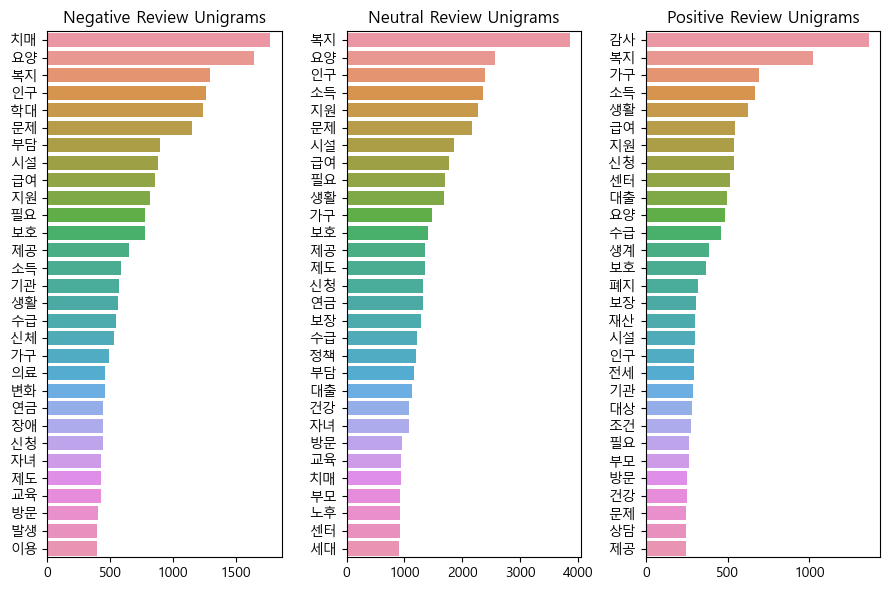

In [6]:
# 부정, 중립, 긍정 리뷰에 대한 Unigram 추출 및 시각화
unigrams_neg = count_ngrams(df[df['sentiment']==-1]['doc_token_noun'], 1)
unigrams_neu = count_ngrams(df[df['sentiment']==0]['doc_token_noun'], 1)
unigrams_pos = count_ngrams(df[df['sentiment']==1]['doc_token_noun'], 1)

# 1x3 그리드의 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(9,6))
num = 30   # 상위 30개의 Unigram만 시각화
sns.barplot(x=list(unigrams_neg.values())[:num], y=list(unigrams_neg.keys())[:num], ax=axes[0])
sns.barplot(x=list(unigrams_neu.values())[:num], y=list(unigrams_neu.keys())[:num], ax=axes[1])
sns.barplot(x=list(unigrams_pos.values())[:num], y=list(unigrams_pos.keys())[:num], ax=axes[2])

# 서브플롯 타이틀 설정
axes[0].set_title('Negative Review Unigrams')
axes[1].set_title('Neutral Review Unigrams')
axes[2].set_title('Positive Review Unigrams')

# 서브플롯 간 간격 조절
plt.tight_layout()
plt.show()

### Bigrams : 2개의 단어로 토큰화

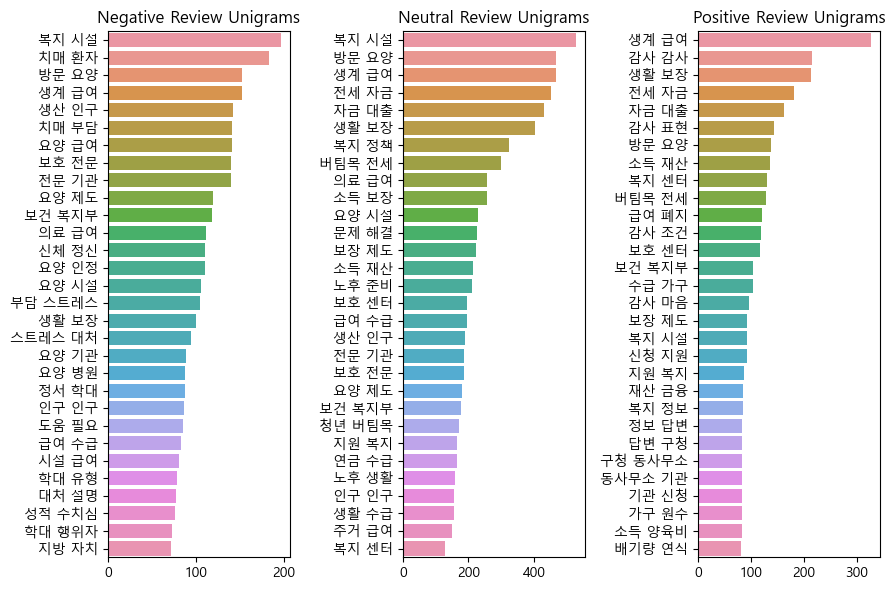

In [7]:
# 부정, 중립, 긍정 리뷰에 대한 Bigram 추출 및 시각화
unigrams_neg = count_ngrams(df[df['sentiment']==-1]['doc_token_noun'], 2)
unigrams_neu = count_ngrams(df[df['sentiment']==0]['doc_token_noun'], 2)
unigrams_pos = count_ngrams(df[df['sentiment']==1]['doc_token_noun'], 2)

# 1x3 그리드의 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(9,6))
num = 30   # 상위 30개의 Bigram만 시각화
sns.barplot(x=list(unigrams_neg.values())[:num], y=list(unigrams_neg.keys())[:num], ax=axes[0])
sns.barplot(x=list(unigrams_neu.values())[:num], y=list(unigrams_neu.keys())[:num], ax=axes[1])
sns.barplot(x=list(unigrams_pos.values())[:num], y=list(unigrams_pos.keys())[:num], ax=axes[2])

# 서브플롯 타이틀 설정
axes[0].set_title('Negative Review Unigrams')
axes[1].set_title('Neutral Review Unigrams')
axes[2].set_title('Positive Review Unigrams')

# 서브플롯 간 간격 조절
plt.tight_layout()
plt.show()